In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np

In [27]:
gdp = pd.read_excel('./data/GDP_percapita.xls')
gdp.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,23512.602596,24985.993281,24713.698045,25025.099563,25533.56978,25796.380251,25239.600411,25630.266492,NaN,NaN


In [28]:
gdp = gdp[['Country Name', '2015', '2016', '2017', '2018']]

In [29]:
gdp = gdp.dropna(thresh=3)

In [30]:
gdp['average'] = gdp.iloc[:, 1:].astype(float).mean(axis=1)
gdp.sort_values('average', ascending=False)

,Country Name,2015,2016,2017,2018,average
119,Monaco,165937.865343,169915.804840,167101.759377,185741.279992,172174.177388
114,Luxembourg,101376.496574,104278.390972,107361.306947,116639.888047,107414.020635
33,Switzerland,82081.609206,80172.193304,80450.045820,82796.547163,81375.098873
87,Isle of Man,81606.280033,79155.541672,80989.172211,NaN,80583.664639
116,"Macao SAR, China",75340.986981,74061.086035,81516.674925,87208.535913,79531.820963
47,Cayman Islands,76280.486253,78296.099927,81124.513479,NaN,78567.033220
143,Norway,74355.515858,70460.560532,75496.754058,81697.245984,75502.519108
89,Ireland,61995.422779,63197.082374,69649.882740,78806.431996,68412.204972
92,Iceland,52428.595763,61757.949306,71314.774196,73191.116315,64673.108895
161,Qatar,63039.016555,57163.060992,61264.396478,68793.784437,62565.064615


In [31]:
#Remove Monaco from dataset because it is an outlier and does not show up on a map
gdp = gdp.loc[gdp['Country Name']!='Monaco']

In [32]:
#Luxembourg is another outlier that is difficult to visualize on a map
gdp = gdp.loc[gdp['Country Name']!='Luxembourg']

In [33]:
# Read in world happiness report to merge with gdp datase
whr15 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2015.csv')

In [34]:
#Rename columns to be able to merge datasets
gdp = gdp.rename(columns={'Country Name' : 'Country'})

In [35]:
#Merge gdp and WHR
gdp_whr15 = gdp.merge(whr15, on='Country', how='inner')
gdp_whr15.head()

,Country,2015,2016,2017,2018,average,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,578.466353,547.228110,556.302139,520.896603,550.723301,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,Angola,4166.979684,3506.072885,4095.812942,3432.385736,3800.312812,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
2,Albania,3952.829458,4124.108907,4532.890162,5268.848504,4469.669258,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
3,United Arab Emirates,38663.383807,38141.846759,39811.634702,43004.953358,39905.454656,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
4,Argentina,13789.060425,12790.242473,14591.863381,11683.949622,13213.778975,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


### Ascribe rank to the average GDP and dystopia levels

In [36]:
gdp_whr15['rank'] = gdp_whr15.average.rank(ascending=0).astype(int)

In [37]:
gdp_whr15['dystopia_rank'] = gdp_whr15['Dystopia Residual'].rank(ascending=False)

### GDP per capita vs Happiness Rank - positive correlation observed

Text(0.5, 1.0, 'GDP per Capita vs Happiness Rank')

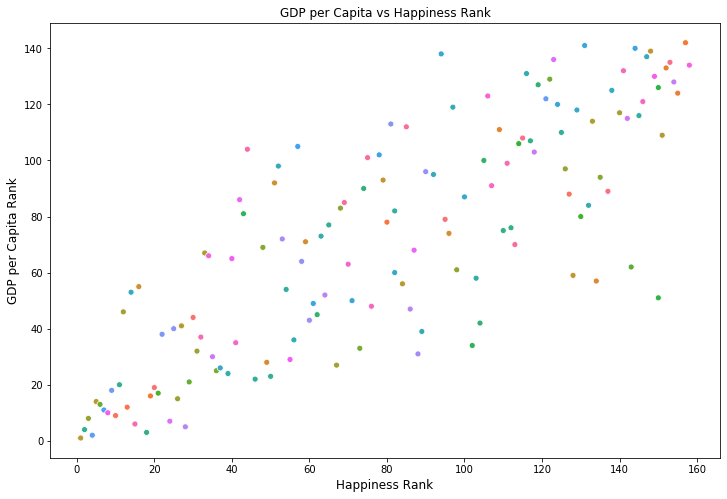

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=gdp_whr15, x='Happiness Rank', y='rank', hue='Country', legend=False)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('GDP per Capita Rank', fontsize=12)
plt.title('GDP per Capita vs Happiness Rank')

In [39]:
# Get Pearson correlation coefficient
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[1,0]
r=pearson_r(gdp_whr15['Happiness Rank'], gdp_whr15['rank'])
print(r)

0.812159675046509


### Plot GDP per capita vs dystopia - no correlation 

Text(0.5, 1.0, 'GDP per Capita vs Dystopia Rank')

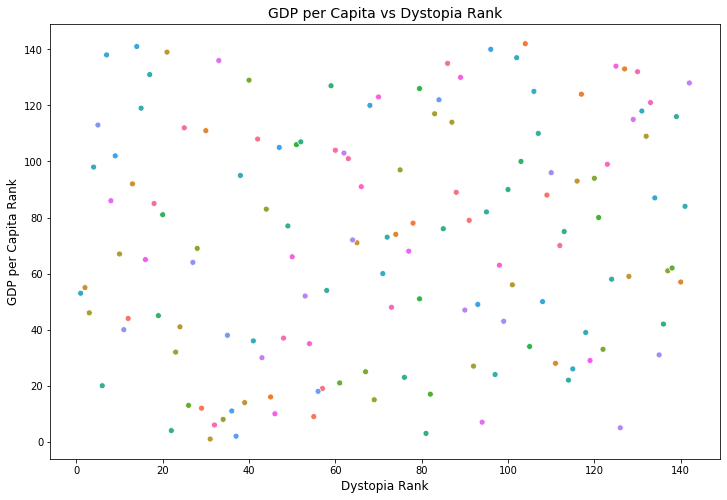

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=gdp_whr15, x='dystopia_rank', y='rank', hue='Country', legend=False)
plt.xlabel('Dystopia Rank', fontsize=12)
plt.ylabel('GDP per Capita Rank', fontsize=12)
plt.title('GDP per Capita vs Dystopia Rank', fontsize=14)

In [41]:
# World avg GDP per capita
gdp.average.mean()

14573.745969566327

### Subset dataframe to only include the happiest and least happiest countries (gdp_top & gdp_bottom, respectively)

In [42]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand', 
'Australia', 'Sweden', 'Austria')

gdp_top = gdp.loc[gdp['Country'].isin(top_countries)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

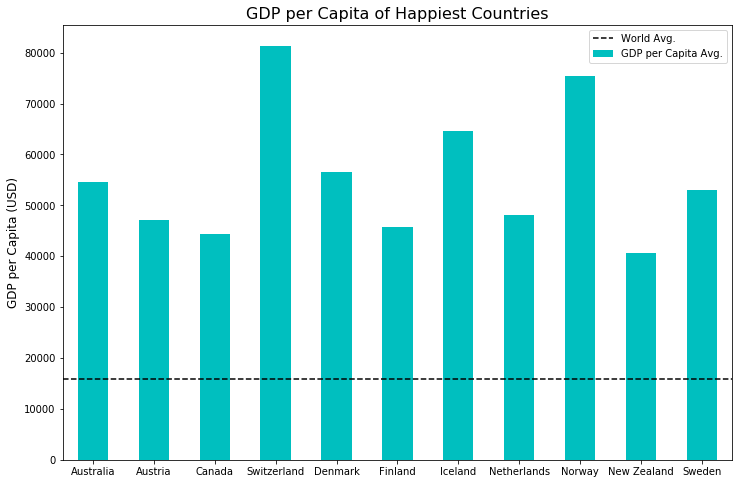

In [43]:
gdp_top.plot(kind='bar', x='Country', y='average', color='c', figsize=(12,8))
plt.axhline(y=15801, color='black', linestyle='--')

plt.legend(labels=('World Avg.', 'GDP per Capita Avg.'))
plt.xlabel('')
plt.ylabel('GDP per Capita (USD)', fontsize=12)
plt.title('GDP per Capita of Happiest Countries', fontsize=16)
plt.xticks(rotation=0)

In [44]:
bottom_countries = ('Togo', 'Burundi', 'Syria', 'Benin', 'Rwanda', 'Afghanistan', 'Burkina Faso', 'Ivory Coast', 'Guinea',
'Chad', 'Liberia', 'Tanzania', 'Madagascar', 'Central African Republic', 'South Sudan', 'Yemen', 'Haiti', 'Malawi', 'Botswana')

gdp_bottom = gdp.loc[gdp['Country'].isin(bottom_countries)]

Text(0.5, 1.0, 'GDP per Capita of Least Happiest Countries')

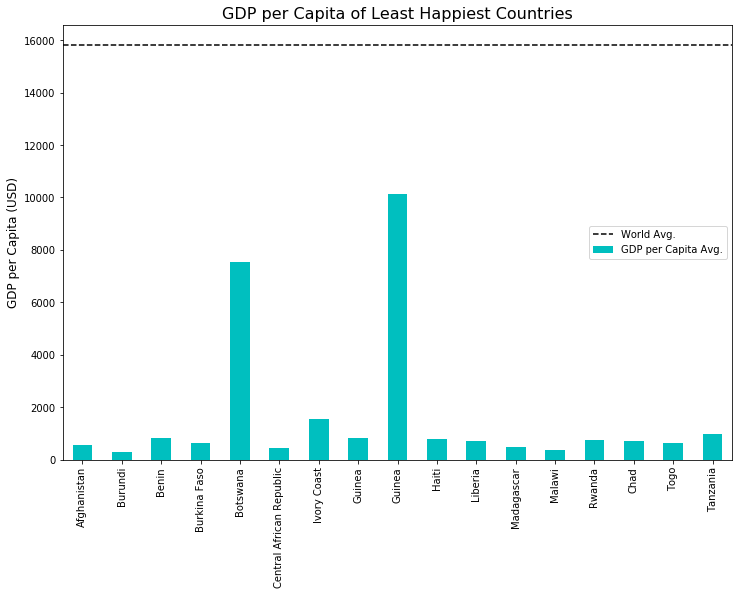

In [45]:
gdp_bottom.plot(kind='bar', x='Country', y='average', color='c', figsize=(12,8))
plt.axhline(y=15801, color='black', linestyle='--')
plt.legend(labels=('World Avg.', 'GDP per Capita Avg.'))
plt.xlabel('')
plt.ylabel('GDP per Capita (USD)', fontsize=12)
plt.title('GDP per Capita of Least Happiest Countries', fontsize=16)


### World map of average GDP per capita

In [46]:
data = dict(type = 'choropleth', 
           locations = gdp_whr15['Country'],
           locationmode = 'country names',
           z = gdp_whr15['average'], 
           text = gdp_whr15['Country'],
           colorbar = {'title':'GDP per Capita'},                              
           colorscale = 'Spectral',
           )
layout = dict(title = 'Average GDP per Capita', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)
